# Regresión

El conjunto de datos Student_Performance.csv tiene como objetivo proporcionar información sobre la relación entre las variables predictoras y el índice de desempeño. Los investigadores y analistas de datos pueden utilizar este conjunto de datos para explorar el impacto de las horas de estudio, los puntajes anteriores, las actividades extracurriculares, las horas de sueño y las preguntas de muestra en el desempeño estudiantil. 

## 1)
Cargar y revisar integridad de dataset

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [59]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [60]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [61]:
print("Datos nulos en el dataset:")
df.isnull().sum()

Datos nulos en el dataset:


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

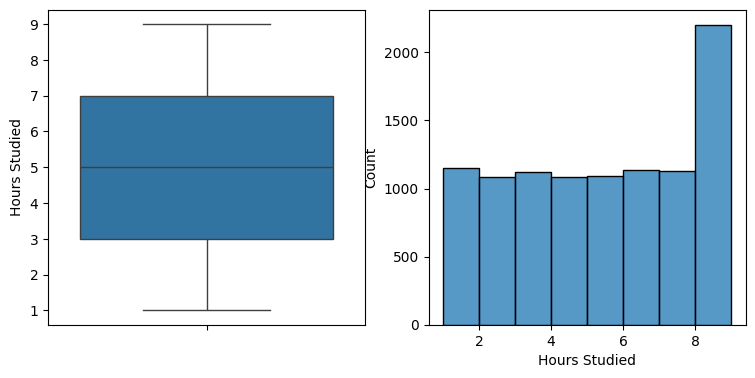

In [62]:
plt.figure(figsize=(9, 9))

plt.subplot(2,2,1)
sns.boxplot(data=df['Hours Studied'])
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.histplot(data=df['Hours Studied'], bins=8)
plt.show()


In [63]:
# Boxplot
fig = px.box(df, y='Hours Studied')
fig.update_layout(title='Boxplot of Hours Studied')

# Histogram
fig2 = px.histogram(df, x='Hours Studied', nbins=8)
fig2.update_layout(title='Histogram of Hours Studied')

# Display the plots
fig.show()
fig2.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

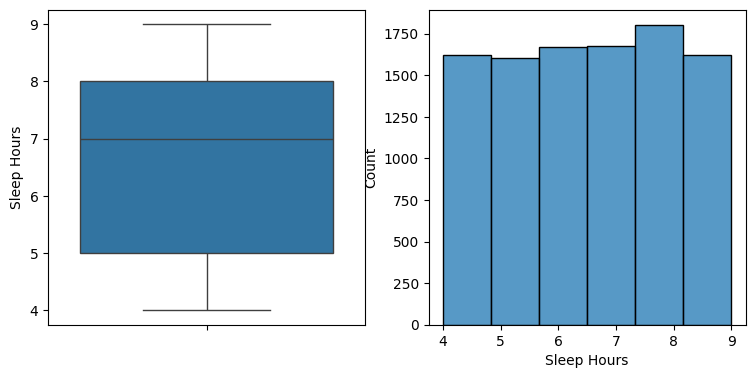

In [ ]:
plt.figure(figsize=(9, 9))

plt.subplot(2,2,1)
sns.boxplot(data=df['Sleep Hours'])
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.histplot(data=df['Sleep Hours'], bins=6)
#sns.boxplot(data=df['Sleep Hours'])
plt.show()

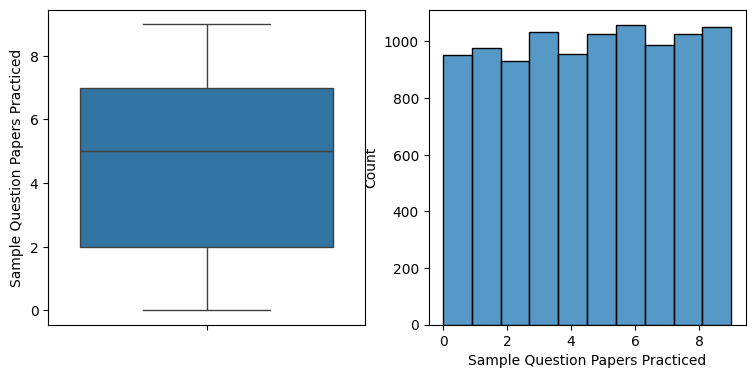

In [ ]:
plt.figure(figsize=(9, 9))

plt.subplot(2,2,1)
sns.boxplot(data=df['Sample Question Papers Practiced'])
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.histplot(data=df['Sample Question Papers Practiced'], bins=10)
plt.show()

<Axes: xlabel='Extracurricular Activities', ylabel='Count'>

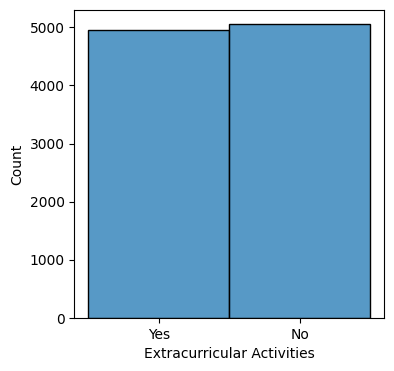

In [ ]:
plt.figure(figsize=(4, 4))

sns.histplot(data=df['Extracurricular Activities'], bins=2)

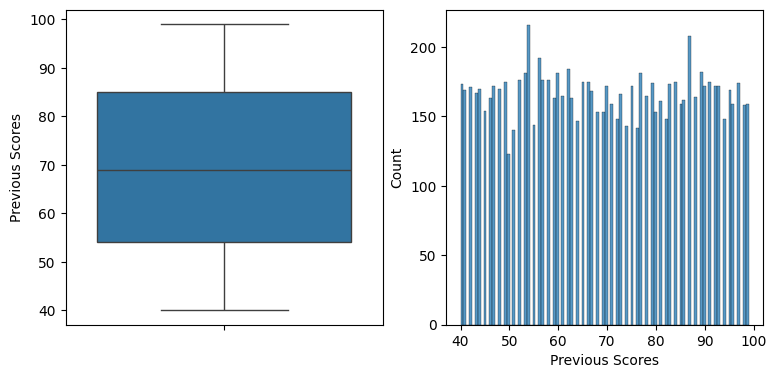

In [ ]:
plt.figure(figsize=(9, 9))

plt.subplot(2,2,1)
sns.boxplot(data=df['Previous Scores'])
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.histplot(data=df['Previous Scores'], bins=100)
plt.show()

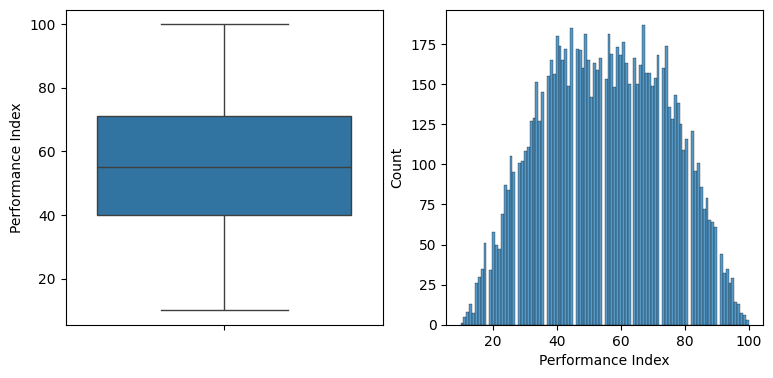

In [ ]:
plt.figure(figsize=(9, 9))

plt.subplot(2,2,1)
sns.boxplot(data=df['Performance Index'])
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.histplot(data=df['Performance Index'], bins=100)
plt.show()

# 2)
Realizar graficos en plotly express de correlacion del dataset completo y un scater para cada una de las dimensiones. A partir de lo graficado sacar 3 conclusiones que a su parecer son importantes o llamativas en relación. 

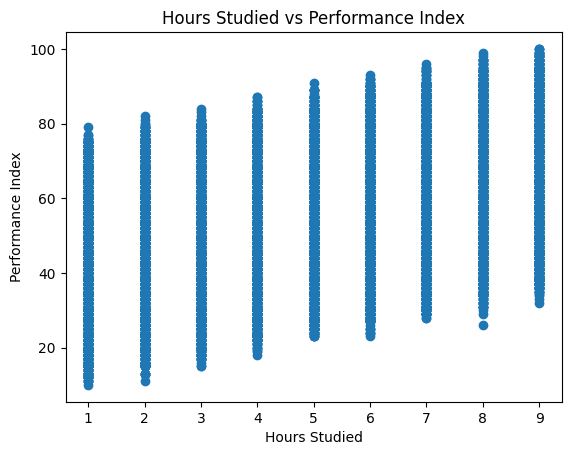

In [ ]:
plt.scatter(df['Hours Studied'], df['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Hours Studied vs Performance Index')
plt.show()

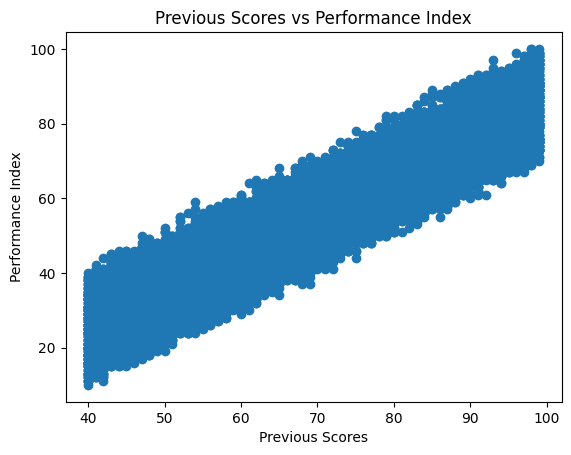

In [ ]:
plt.scatter(df['Previous Scores'], df['Performance Index'])
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Previous Scores vs Performance Index')
plt.show()

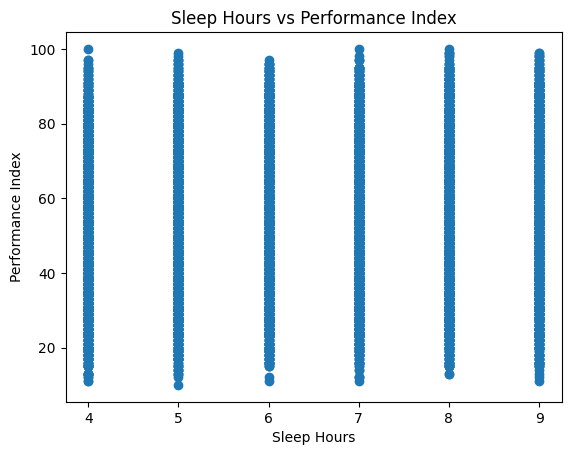

In [ ]:
plt.scatter(df['Sleep Hours'], df['Performance Index'])
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.title('Sleep Hours vs Performance Index')
plt.show()

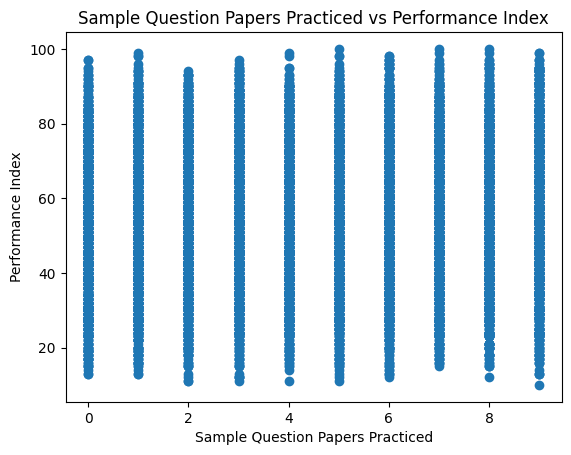

In [ ]:
plt.scatter(df['Sample Question Papers Practiced'], df['Performance Index'])
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.title('Sample Question Papers Practiced vs Performance Index')
plt.show()

In [ ]:
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

In [ ]:
one_hot_encoded = pd.get_dummies(X['Extracurricular Activities'], prefix='ex_act')
X_ohe = pd.concat([X, one_hot_encoded], axis=1).drop(columns=['Extracurricular Activities'])
X_ohe

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,ex_act_No,ex_act_Yes
0,7,99,9,1,False,True
1,4,82,4,2,True,False
2,8,51,7,2,False,True
3,5,52,5,2,False,True
4,7,75,8,5,True,False
...,...,...,...,...,...,...
9995,1,49,4,2,False,True
9996,7,64,8,5,False,True
9997,6,83,8,5,False,True
9998,9,97,7,0,False,True


## 4)
Realizar la separación del dataset en 3 partes: 60% Train, 20% Test y 20% Validation HINT: Ciertas bibliotecas no tienen la separación en 3 conjuntos directamente pero podrías utilizar múltiples veces una que separe en 2 conjuntos preservando las proporciones dadas. TIP: El fin de la data de validacion es que prueben los distintos hiperparámetros, para que el modelo no tenga un overfitting al probar la data de test.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.4, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## 3)
Realizar la estandarización de datos correspondiente para que los datos tengan la misma escala

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

continous_columns = ['Previous Scores']
mm = MinMaxScaler()

X_train[continous_columns] = mm.fit_transform(X_train[continous_columns])
X_test[continous_columns] = mm.transform(X_test[continous_columns])
X_validation[continous_columns] = mm.transform(X_validation[continous_columns])

X_train

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,ex_act_No,ex_act_Yes
9761,6,0.661017,5,1,True,False
3159,4,0.593220,8,6,True,False
1489,3,0.593220,8,1,True,False
2987,9,0.677966,9,9,False,True
812,1,0.406780,6,9,True,False
...,...,...,...,...,...,...
5734,8,0.169492,6,6,False,True
5191,4,0.474576,9,3,True,False
5390,9,0.135593,7,6,True,False
860,1,0.118644,9,0,True,False


## 5)

Entrenar 3 modelos de regresion; Linear Regression, Random Forest Regressor y decision tree regressor, evaluar con metricas correspondientes. Luego optimizar los hiperparamétros de cada uno y volver a evaluar.


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
c = lr.intercept_
c

7.157532560108912

In [ ]:
m = lr.coef_
m

array([ 2.85874472, 59.92078362,  0.47214632,  0.18148699, -0.30123586,
        0.30123586])

In [ ]:
print(f"Máximo valor entre los coeficientes: {max(m)}, corresponde a la característica '{X_train.columns[np.argmax(m)]}'")

Máximo valor entre los coeficientes: 59.92078361737477, corresponde a la característica 'Previous Scores'


In [ ]:
Y_pred_test = lr.predict(X_test)
Y_pred_test

array([45.99792921, 77.19374054, 48.04131703, ..., 52.63569593,
       24.55610083, 15.4364065 ])

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

mape = mean_absolute_percentage_error(y_test, Y_pred_test) * 100
r2 = r2_score(y_test, Y_pred_test)

print(f'MAPE: {mape:.2f} %')
print(f'R2: {r2:.4f}')

MAPE: 3.53 %
R2: 0.9887


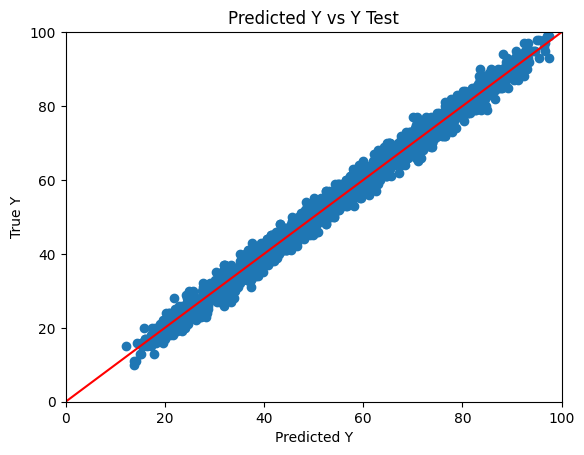

In [ ]:
plt.scatter(Y_pred_test, y_test)
plt.ylabel('True Y')
plt.xlabel('Predicted Y')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Predicted Y vs Y Test')
plt.plot([0, 100], [0, 100], color='red')
plt.show()


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

Y_pred_test_rf = rf.predict(X_test)
Y_pred_test_rf

array([46.16404762, 76.04      , 47.34      , ..., 54.57      ,
       23.15      , 16.29      ])

In [ ]:
rf.feature_importances_

array([1.42107428e-01, 8.46839224e-01, 4.66311443e-03, 4.99295969e-03,
       7.07939349e-04, 6.89335150e-04])

In [ ]:
print(f"Máximo valor entre los coeficientes: {max(rf.feature_importances_)}, corresponde a la característica '{X_train.columns[np.argmax(rf.feature_importances_)]}'")

Máximo valor entre los coeficientes: 0.8468392238022071, corresponde a la característica 'Previous Scores'


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

mape = mean_absolute_percentage_error(y_test, Y_pred_test_rf) * 100
r2 = r2_score(y_test, Y_pred_test_rf)

print(f'MAPE: {mape:.2f} %')
print(f'R2: {r2:.4f}')

MAPE: 3.98 %
R2: 0.9855


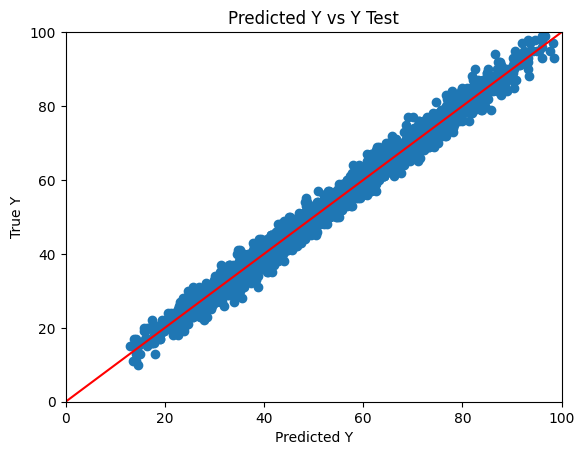

In [ ]:
plt.scatter(Y_pred_test_rf, y_test)
plt.ylabel('True Y')
plt.xlabel('Predicted Y')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Predicted Y vs Y Test')
plt.plot([0, 100], [0, 100], color='red')
plt.show()

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

Y_pred_test_dt = dt.predict(X_test)
Y_pred_test_dt

array([44., 77., 45., ..., 54., 24., 15.])

In [ ]:
featute_importances = dt.feature_importances_
featute_importances

array([1.43819424e-01, 8.44761902e-01, 4.71750480e-03, 5.28496454e-03,
       7.34813916e-04, 6.81391182e-04])

In [ ]:
print(f"Máximo valor entre los coeficientes: {max(featute_importances)}, corresponde a la característica '{X_train.columns[np.argmax(featute_importances)]}'")

Máximo valor entre los coeficientes: 0.8447619019186766, corresponde a la característica 'Previous Scores'


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

mape = mean_absolute_percentage_error(y_test, Y_pred_test_dt) * 100
r2 = r2_score(y_test, Y_pred_test_dt)

print(f'MAPE: {mape:.2f} %')
print(f'R2: {r2:.4f}')

MAPE: 5.08 %
R2: 0.9763


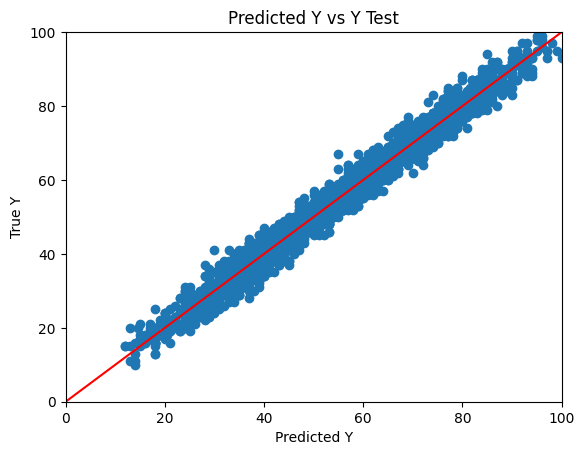

In [ ]:
plt.scatter(Y_pred_test_dt, y_test)
plt.xlabel('Predicted Y')
plt.ylabel('True Y')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Predicted Y vs Y Test')
plt.plot([0, 100], [0, 100], color='red')
plt.show()